In [31]:
import torch
import torch.nn as nn
from tqdm import tqdm
from torch.utils.data import DataLoader
import sys
sys.path.append(sys.path[0]+'/../')
from dataloaders.minc_dataloader import MINCDataset
from dataloaders.irh_dataloader import IRHDataset
from utils.loss_resnet import LossRN
from models.fusion_resnet import fusion_resnet
from torchvision.models import resnet50, resnet34
from utils.loss_resnet import LossRN
import numpy as np


In [32]:
min_path = '/home/ahmed/workspace/notebook/matrec/datasets/minc'
labels_path_t = '/home/ahmed/workspace/notebook/matrec/datasets/minc/test.txt'

dataset_test = MINCDataset(min_path, labels_path_t)
test_loader = DataLoader(dataset=dataset_test, batch_size=8, num_workers=0, pin_memory=False, shuffle=True)

In [33]:
path = '/home/ahmed/workspace/notebook/matrec/datasets/irh/files/patches/'
labels_path = '/home/ahmed/workspace/notebook/matrec/datasets/irh/files/patches/labels.csv'

dataset_train = IRHDataset(path, labels_path)
train_loader = DataLoader(dataset=dataset_train, batch_size=8, num_workers=0, pin_memory=False, shuffle=True)


resnet = resnet34().cuda()
resnet.fc = nn.Linear(resnet.fc.in_features, 23).cuda()
resnet.load_state_dict(torch.load("../weights/resnet34_minc.pth"), strict=False)
loss = LossRN(False)
dict_minc_2_irh = {1:11, 2:2, 3:1, 4:2, 5:7, 6:7,
                                7:3, 8:7, 9:4, 10:5, 11:6, 12:7,
                                13:8, 14:9, 15:10, 16:1, 17:7,
                                18:7, 19:11, 20:7, 21:9, 22:7, 23:12}

In [34]:
with torch.no_grad():
    ac = 0
    for i in range(90):
        #x,_,_,y = next(iter(train_loader))
        x,y = next(iter(test_loader))
        y_pred = resnet(x.cuda())
        _ac = loss.accuracy(y_pred, y)
        #print(_ac)
        ac = ac + _ac
    ac = ac/90
    print(float(ac))

44.72222137451172


In [35]:
#x,_,_,y = next(iter(train_loader))
x,y = next(iter(test_loader))
y_pred = resnet(x.cuda())
y_pred = torch.argmax(y_pred, -1)
for i in range(y_pred.shape[0]):
    pass#y_pred[i] = dict_minc_2_irh[int(y_pred[i].item())]
print(y_pred, '\n', y)

tensor([22,  3,  4, 14, 12,  3,  9,  9], device='cuda:0') 
 tensor([10, 10,  4, 14, 12,  3,  3,  9])


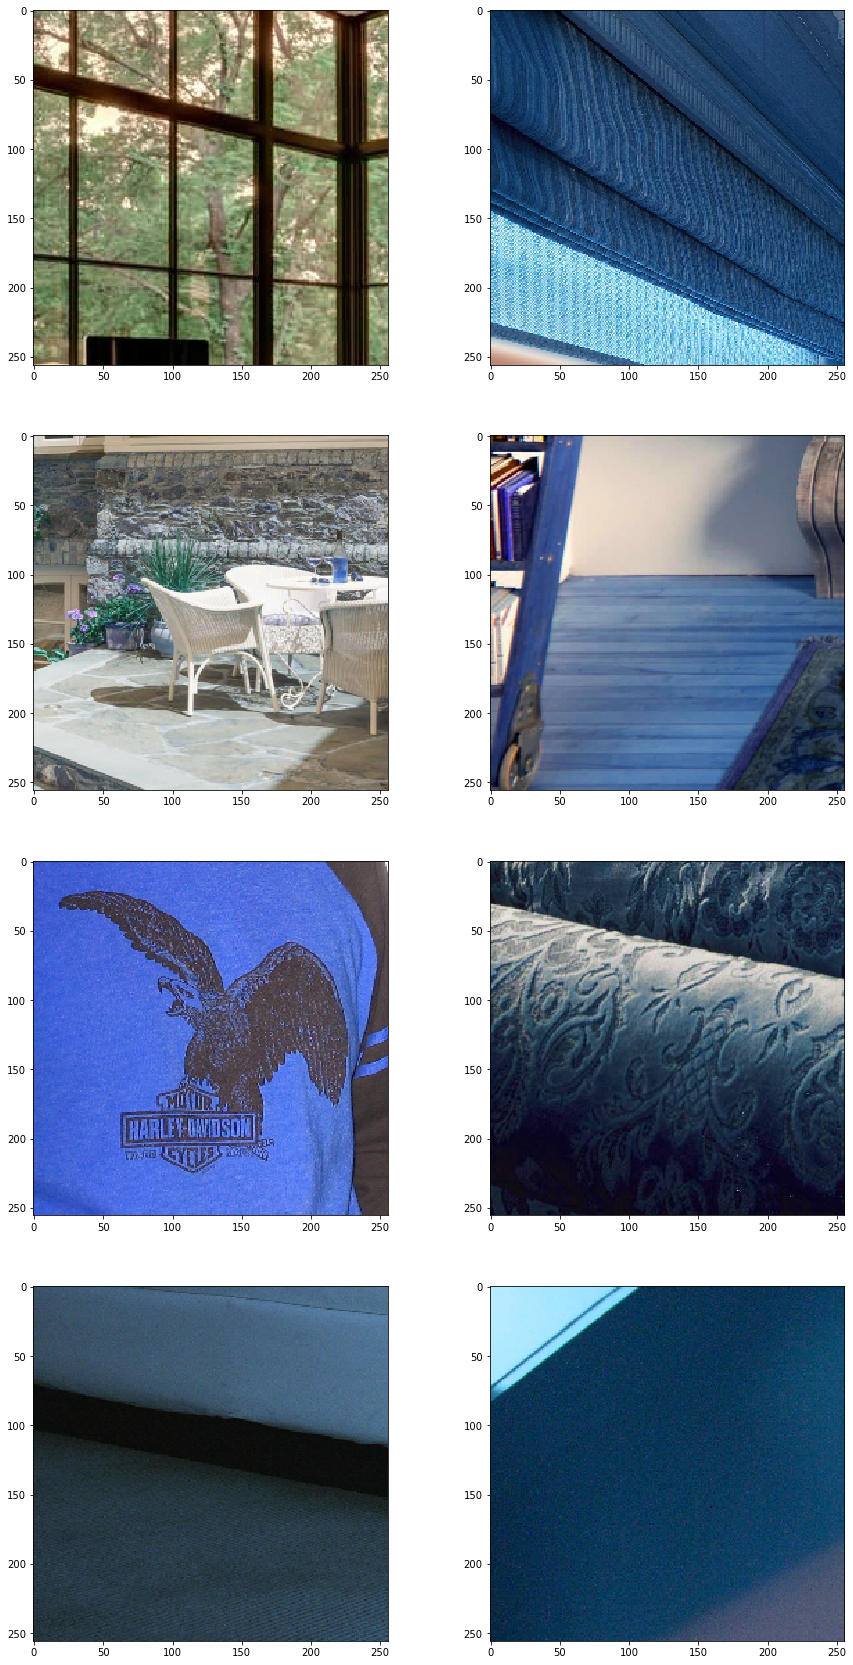

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4, 2, figsize=(15,30))


ax[0,0].imshow(x[0].permute(1, 2, 0))
ax[0,1].imshow(x[1].permute(1, 2, 0))
ax[1,0].imshow(x[2].permute(1, 2, 0))
ax[1,1].imshow(x[3].permute(1, 2, 0))

ax[2,0].imshow(x[4].permute(1, 2, 0))
ax[2,1].imshow(x[5].permute(1, 2, 0))
ax[3,0].imshow(x[6].permute(1, 2, 0))
ax[3,1].imshow(x[7].permute(1, 2, 0))